# Задание 1.
У нас есть данные АА-теста с '2022-01-07' по '2022-01-13'. Вам нужно сделать симуляцию, как будто мы провели 10000 АА тестов. 
На каждой итерации вам нужно сформировать подвыборки с повторением в 500 юзеров из 2 и 3 экспериментальной группы. 
Провести сравнение этих подвыборок t-testом. 

### Задача:
1. Построить гистограмму распределения получившихся 10000 p-values.
2. Посчитать, какой процент p values оказался меньше либо равен 0.05
3. Написать вывод по проведенному АА-тесту, корректно ли работает наша система сплитования.

### 1. Подготовка к работе

In [1]:
# Подгружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandahouse
from scipy import stats

### 2. Загрузка данных

In [2]:
# Подключение к БД
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': '*****************'
}

# Запрос к БД
query = '''
SELECT user_id,
       exp_group,
       countIf(user_id, action = 'like' ) as like,
       countIf(user_id, action = 'view' ) as view,
       like/view as ctr
FROM simulator_20220120.feed_actions
WHERE (toDate(time) >= '2022-01-07' AND toDate(time) <= '2022-01-13' 
AND exp_group in [2,3])
GROUP BY user_id, exp_group
'''

# Создание датафрейма
df = pandahouse.read_clickhouse(query, connection=connection)

In [3]:
# Проверка df
df

user_id  exp_group  like  view       ctr
0       115383          3    11    36  0.305556
1       123580          3    15    92  0.163043
2       131473          2    26   148  0.175676
3        23985          2    12    66  0.181818
4        24523          2    17   120  0.141667
...        ...        ...   ...   ...       ...
17044   122008          3     4    31  0.129032
17045    25383          2    16    57  0.280702
17046   122190          3    25    74  0.337838
17047   108927          2     8    33  0.242424
17048    17310          2     2    14  0.142857

[17049 rows x 5 columns]

### 3. Анализ данных

Распределения для 2й и 3й экспериментальной группы

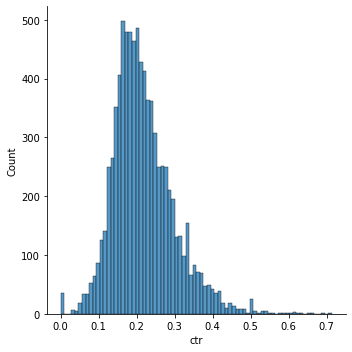

In [82]:
# Распределение экспериментальной группы 2
sns.displot(df[df.exp_group == 2].ctr, kde = False)

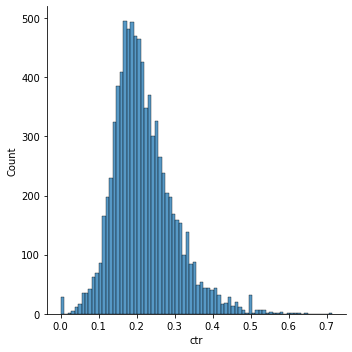

In [83]:
# Распределение экспериментальной группы 3
sns.displot(df[df.exp_group == 3].ctr, kde = False)

Xарактер распределения и медиана схожие. В целом явных визуальных различий в распределениях между экспериментальными группами не замечено

In [8]:
 df[df.exp_group == 2].ctr.var()


0.006503262190344655

In [9]:
 df[df.exp_group == 3].ctr.var()


0.006550067789213359

In [6]:
%%time

# Проводим выборку с повторениями в экспериментальных группах 2 и 3
count_tests = 10000
n_samples = 500
ctr_list = []
for i in range(count_tests):
    first_group = df[df.exp_group == 2].ctr.sample(n_samples, replace=True)
    secong_group = df[df.exp_group == 3].ctr.sample(n_samples, replace=True)
    p_val = stats.ttest_ind(first_group, secong_group, equal_var = False)[1]
    a=ctr_list.append(p_val)
    print(p_val)

0.5394020303853623
0.4079615951554284
0.16244860115217039
0.003029749961878089
0.042146580763365304
0.8562357858962095
0.2179705323773042
0.23092371353876223
0.12680454000577665
0.5797469994173422
0.9686692650815629
0.8517924812709439
0.6196453297488834
0.5555174831867915
0.8357691214626519
0.24018283566688758
0.005663285619663035
0.36777833070098664
0.3084553078830469
0.352727074061985
0.20551019492387956
0.2929393287448212
0.616066471625066
0.13362736853384796
0.26577382088226015
0.5935828097715155
0.5871674284381361
0.8738065342408468
0.8395014804564632
0.4617750107648849
0.9969980892390888
0.7569647182233469
0.9356928751834324
0.12323319313468263
0.44783627857135977
0.8092554459301704
0.7113073735361053
0.6757510603064665
0.3407336851819537
0.9208924948126629
0.9201989269167863
0.9499285104630026
0.6998385355179866
0.3687259158717181
0.48561988198655737
0.7466994534870532
0.03123849071538387
0.3638482687854384
0.5812642058041837
0.975906475630486
0.2880870805892193
0.04158550410963

0.1126612254095575
0.5080429347006046
0.1444177720886438
0.34266427633844365
0.20193760193099658
0.9086404416407534
0.04732746582517787
0.8857310910931414
0.4852711239349492
0.9632208610989542
0.54147027047506
0.1161839583165214
0.9265394009188048
0.027087621274159132
0.8784509600191985
0.21426661816733594
0.6784214155758823
0.5615153642697057
0.14390748456797023
0.28690796325889145
0.3247121499844977
0.9797255869210705
0.2760965706106782
0.0030705971628722873
0.14666133956042773
0.5104676380262971
0.7284377427326798
0.4351762471801205
0.3054147192210011
0.0942218820393608
0.1523816571192628
0.7576501465802652
0.1394705258316026
0.5692839044938345
0.9646492403013335
0.6965833099317559
0.7836521009619293
0.3931030245504561
0.4338086136615651
0.9247514437268389
0.9699162910283462
0.3776953272400534
0.17066948870760157
0.09819740352031582
0.28884506426400136
0.3000765609858287
0.47910087168113435
0.05850101658981733
0.8607743005090928
0.35025416199500914
0.7088836795667016
0.7850596589106

0.0011511720080019782
0.3906964108300628
0.6700067125932992
0.11586355450738861
0.5750018521758018
0.3573028865167146
0.9375596442211036
0.18462740367530311
0.503051625886755
0.04752973857541512
0.5167376159634709
0.6881735528738013
0.8993893516454609
0.584847027803469
0.06720905854464243
0.041041986199689025
0.17506406915086434
0.7153210524098932
0.14107014009799443
0.5452625847726587
0.9094915738729438
0.5872666497999618
0.9894646097596554
0.4666730779216698
0.36660260258740884
0.0783571309363201
0.007966263609172514
0.16886967160353
0.29557365067745434
0.3469006760235389
0.5331405944150547
0.2717997652011843
0.4164045035965662
0.3166051074457009
0.375569198550615
0.4438766257155927
0.5633413709458286
0.6242321262960077
0.5991002250021529
0.38485726041154666
0.6394142236240359
0.3383162777079156
0.6132444880025556
0.4256138795918847
0.7153500554362928
0.5080202347661442
0.03417303821269237
0.7878737562448328
0.32577568328881246
0.5368278043625253
0.06777045966156428
0.199330660347536

0.8210878918343838
0.7480403375904656
0.9272507849984646
0.9952169769014232
0.5895656830098899
0.1535513941136821
0.3816152892760435
0.6886608054116041
0.4410452342956037
0.8305724060289492
0.3082817218433018
0.9787752299061915
0.8884336665041656
0.06744964491138317
0.4708961203624008
0.07170783323969031
0.8257315165404207
0.5029947126235956
0.14632731185208198
0.0943914708468532
0.8631209659365247
0.7624798760414467
0.7274612077796735
0.5882524849869513
0.404541490965453
0.9323947127397896
0.41606237718989847
0.7603311238209779
0.5438830975176312
0.9465321519626326
0.8741255455647046
0.9291922517511101
0.9762009905408643
0.344431057862438
0.40570624789625787
0.5013980090115446
0.6607619085535508
0.8208149107404231
0.8810934593055184
0.2157781145068791
0.4740188246255794
0.3439665539104131
0.5445802142729587
0.6972469941187037
0.39047307183951685
0.6148233780417902
0.43179042651210153
0.5369468028605826
0.8104062455382678
0.7148025266057992
0.06192451643914694
0.3315433184457849
0.5666

0.6964669464335396
0.4723126734114914
0.23988402161639244
0.03311806232777572
0.4972325865897661
0.4419310593033202
0.4502869151428702
0.0746617782336572
0.43943232939108845
0.34733526158385597
0.3880773191003277
0.02674160593548536
0.8785706840608194
0.5317957789220108
0.8756442461686107
0.5148697879877664
0.050034641780523845
0.9754732938895097
0.9311164552043236
0.2005158619131277
0.6166441892710599
0.5802075057244911
0.5654130929257049
0.6303996728585339
0.655328272037353
0.6232050288801921
0.4763079285641808
0.42158561476123113
0.8030192330043826
0.5838273414921759
0.0016281497669170424
0.8174243719661063
0.2861112422361844
0.8612424977202998
0.312511424091056
0.9941364133146247
0.15638511760400364
0.7897859562640974
0.7577402503202182
0.10678883856225736
0.29723799416925556
0.7400322715692808
0.18668061342295608
0.6108558810850011
0.5240781398875978
0.4782023219245798
0.04652010291861131
0.6948251295684112
0.4297383247507467
0.5301968262261145
0.20973396452226667
0.02004909237432

0.408963776540995
0.6508178169289871
0.806132513104271
0.24786435583117133
0.6197327098301724
0.0073056747534971595
0.9357350040984053
0.9335534418187229
0.0102299185771276
0.726502706043983
0.5282361680455356
0.5416102693778093
0.014882081062235522
0.9675968472752228
0.8680751988434087
0.23373946663554493
0.7424801765731986
0.9953576042322874
0.9747853252300674
0.2555846010926355
0.3950489067983308
0.5863113011100158
0.7672859203378807
0.1636385761900982
0.3218979862364037
0.6526342729905656
0.3432492522636119
0.8244681077865426
0.48132092883138544
0.4025437703373187
0.49880952719749805
0.9666068124614097
0.4714889064647281
0.4397025704168721
0.13232686377357336
0.9190690022817625
0.13102707637646646
0.2644217602143415
0.034952106383262294
0.4482431967553767
0.7740859002221249
0.7712447297695548
0.5416371624735555
0.09834045411962083
0.6457704034060249
0.949677886450246
0.8851704664337499
0.36006409201383494
0.14999015219470477
0.7330623930163229
0.8923996337741168
0.10648433702575619

0.6097435787373962
0.6710347223557827
0.8494012490461982
0.5523831024008723
0.6952145156293625
0.29841494062990254
0.5324777748367882
0.313385072079075
0.40777092832336803
0.8053912949490444
0.8404600495951847
0.6052877700422963
0.4203704908242377
0.3892036963717178
0.7158317491770778
0.20824676541483358
0.6245569691032239
0.3462660054981358
0.5087709425566457
0.4094012597761858
0.703130998416887
0.49287425125239714
0.562099550272763
0.3461714559627517
0.5513699864386301
0.7695811819815056
0.9858488684135042
0.7912955242686659
0.7363128853589904
0.8346472767698332
0.8443927958732125
0.39058708714089674
0.3224435872712407
0.2401738309834813
0.3622647687241326
0.4766048444708624
0.16484372788456322
0.43600072068639417
0.6398803195160843
0.8990838412112867
0.017231059966786647
0.7874538339243797
0.8769455646739575
0.15705749210681938
0.009793353110587473
0.07912101236116853
0.4561784067194723
0.24292082344127677
0.25513062404409936
0.5200607477612851
0.08604873986852161
0.3571587180738040

0.6617609785500512
0.8761078992838748
0.3027254906361125
0.05829408517295536
0.7606767102288927
0.047058901301619806
0.24644984687651408
0.4790559146784822
0.3348044963736334
0.09227302097352949
0.37260515813881523
0.31755198028545945
0.6854577867909988
0.3093777252448584
0.7626833349310066
0.260362148339534
0.7628451488514374
0.013008295074407207
0.7124259215059988
0.4186843015490329
0.5444194955878872
0.20411046225353693
0.9064703058986034
0.08590743560641702
0.4051638269536897
0.5811557574652306
0.8793874177948379
0.998114201328653
0.9365731845743839
0.3987666229582403
0.5869311540657576
0.8220132929946953
0.5331539902954858
0.5043160143226508
0.18693616467574886
0.16206848917225247
0.6722197061219628
0.22076747266186691
0.3817019431565195
0.040702539478006505
0.5126104734342242
0.4322349522889858
0.4342836348400603
0.8862639749668456
0.7312606968175104
0.075054106940113
0.2009998080398717
0.28609452880997127
0.5785494201910264
0.5504351204672846
0.47898903180531704
0.88214555536865

0.9305856733990961
0.7664217466944829
0.35921520122666506
0.47927641074580085
0.48377373961061576
0.6875616199168986
0.9752200778593242
0.5361471883757118
0.16070213979261025
0.18150468314221058
0.6330788973390882
0.906054970560671
0.07904497816487632
0.49353968273768145
0.15562156277404363
0.4996087833824824
0.717212943421315
0.2934081374277661
0.9136852255295574
0.28330766159298804
0.9035934814262504
0.9177952335907776
0.40552946099137044
0.38467947969450633
0.06593619420216579
0.4481235696255538
0.38895124852456675
0.3349694755012499
0.4160009901402584
0.1348285243573085
0.06877937653644155
0.2554976729232905
0.44674184919549986
0.03678788112732089
0.47027323039357216
0.22476273106707195
0.25265137196758125
0.6434467483158421
0.5056233094359172
0.43442194763603637
0.631356826024726
0.9946304881481686
0.3278654722038492
0.07936358102741406
0.1412447556198387
0.05547957468616996
0.6045467409410241
0.0552669208439744
0.9891061640764215
0.5755199613390722
0.8337686300946012
0.9942873079

0.9877667394703313
0.839483689031008
0.3422797776910399
0.21885040623973007
0.6307658610373493
0.7187247670926162
0.9445480559409456
0.19384700384326145
0.9019728112841571
0.3205200106991244
0.6698457205833747
0.698117458175189
0.41135219718209437
0.7566791012613866
0.9679190628326091
0.1635612425197875
0.23882051404598115
0.7806873158587562
0.07583126623000003
0.3356179479510416
0.8831065823936817
0.7874110138854877
0.7143663068750363
0.3140406577699442
0.6809818581351339
0.22535504655049254
0.6928022038364177
0.39751775975115355
0.7271392029639827
0.6972443054139487
0.4258798178449442
0.8169284680862918
0.08699961322920594
0.7197706730549447
0.04529284711733649
0.612325002716748
0.8162668391560808
0.24544401359641166
0.11038021794041354
0.6438744077096402
0.7429137857579207
0.6440973561060712
0.728559318327224
0.08084579153201776
0.7050672547648995
0.2892768001409334
0.07328867468733817
0.400921809522521
0.9163191222461886
0.7938073473649134
0.9172708857099473
0.16445753547388897
0.6

0.5723840152924666
0.5340206012726795
0.9462960288447906
0.1616672798679478
0.45740333938114364
0.9395427044445661
0.26972657388731175
0.6394360325066835
0.34728168856259944
0.760146200396038
0.8427794940809354
0.27732331239339053
0.3545769150439436
0.3176792526459849
0.2995503799927763
0.6035569828491889
0.2476195015645103
0.9362378539621513
0.5787739514401309
0.41913290393964386
0.151830576007733
0.8926369555017816
0.4705576793389019
0.6654631359435992
0.589734947036331
0.6664789789340653
0.9081222356848678
0.7534270266443905
0.6490175296817511
0.26047202501534017
0.4755745301500035
0.8181642567108064
0.0538697270173126
0.12801411891310885
0.41060093439075696
0.5062598340242087
0.4736750896022248
0.6760515990199141
0.1495925003064257
0.5432682133377418
0.4398408354368699
0.4989493064731496
0.1542548377036705
0.9961281813089343
0.8782244090798508
0.32146951295766213
0.7396833529490425
0.8563795359936257
0.24284480662674973
0.21429234364220082
0.7837195555567485
0.4205934844810527
0.11

0.11767383533484217
0.7989132227561069
0.5667325959518992
0.6063822823934477
0.7508116459863596
0.4588061733562343
0.10815930537572753
0.3051496126014156
0.790892215975182
0.35536651828815646
0.9313090489769166
0.7561481645736017
0.8920604986850736
0.6479343066388772
0.8451521839318643
0.0069677031208414345
0.636878935225343
0.08323198549670026
0.25729424721129035
0.5236071059017954
0.4725947605524563
0.9679229953545185
0.6764863876327523
0.43143891613409513
0.6336657218563231
0.3251165369036527
0.09489106668760797
0.5222364226932712
0.6275808719112084
0.9689840982134141
0.38925414157414473
0.3898903858371443
0.4193852135883548
0.7228327136034869
0.2611799453231749
0.1278223207917934
0.9240960147365367
0.20567854783576064
0.5681098211715194
0.1599544545510102
0.19230417625810267
0.9421978482891776
0.2694087276858575
0.6956961169875915
0.11340144272587126
0.1883701888595266
0.25258117316835804
0.3996541611189731
0.25177641858148264
0.8884291437415306
0.7175861085224282
0.863752699627348

0.4097611825504497
0.13053128990964188
0.15155270027735132
0.3745882562938737
0.07858466595266066
0.17607883431841725
0.9603886909039483
0.8242506508711583
0.24229314182150757
0.0671868109681048
0.24373407115903709
0.8534198905559192
0.5020699806800364
0.5567795675787166
0.7680395420259822
0.9001116470940904
0.6119672353809511
0.32595707213926317
0.7158857535408403
0.8731186950772851
0.9881345731948464
0.10715768146680024
0.9197390933618741
0.23641879672353294
0.12814895166478102
0.5019347922138936
0.32386109602644586
0.6731944152949609
0.06712100122263827
0.6464903368885171
0.15665653730391702
0.5845318111097466
0.2539428333433519
0.49627478653673696
0.6287626495438525
0.5096524251482661
0.607872775385712
0.41254624024415865
0.3437451414227497
0.9351663096257655
0.6750125410507094
0.9223151842376182
0.2249069029898226
0.4604467966770023
0.15929961324909303
0.09583368581134123
0.1244833371137957
0.8309452127495902
0.3136995236485269
0.7082403573409092
0.006341513808441838
0.74607396554

0.07481344717868003
0.21325278002509104
0.16520376900725958
0.21608290123349752
0.33170788008969965
0.10465533863690207
0.43659416107574
0.12018746346739156
0.40392226193366154
0.8061720184291181
0.9247993894323843
0.06946646494499992
0.5288481350212246
0.7824474536606232
0.7058864922897551
0.8641833456532637
0.8645985290863671
0.5960676422135827
0.6005263748561445
0.8168711358529895
0.05146843020739513
0.3083042949721267
0.6828417587761906
0.40781542490173595
0.13141891623246446
0.08808895966802464
0.07154122266821314
0.9821220211237291
0.1114224307727082
0.002946185735013752
0.05457270733806099
0.2746684173153267
0.7067991084557197
0.565383608638564
0.6776123691057025
0.16083313983356706
0.8207714688372558
0.1378931287326729
0.9701553341811787
0.32983025814224454
0.7136147657912538
0.7052676936710383
0.3617921901540915
0.4586660817626357
0.7605752274354618
0.3376615892154796
0.1032442795512869
0.7173563521552513
0.8830804763171886
0.16928418645521223
0.9289418861316319
0.345561522579

0.3908775029113558
0.9361148771316332
0.621492459864483
0.3534488755740971
0.5103355719216285
0.9958806693282122
0.09987809337269447
0.8737278878154604
0.3668826005275686
0.7311741775915922
0.5136091035810726
0.289164775344261
0.5049377226896052
0.09923742556961673
0.4444732628648558
0.12902045087299407
0.3829170759300503
0.1724092545975447
0.5951652694236751
0.4994716532287602
0.36395030477238155
0.010608542976693136
0.5889321614459134
0.6466141183654213
0.03926574864310094
0.1354409136470118
0.31475002465609164
0.5218361921616609
0.25437208557876195
0.18259670952575316
0.22704073777061987
0.4401413864497472
0.43058088442706755
0.5697397746883467
0.715862247144843
0.7719980695161816
0.4195012759968144
0.8197713117450998
0.1933310228240668
0.707859207777424
0.037782040343126044
0.9794725275687245
0.303976470062601
0.4425162158291711
0.6352014011030678
0.49237125165686146
0.35366798508403474
0.054821220402835345
0.1817896311856515
0.6018985587056658
0.5160896862280862
0.3720439890328113

0.3302921214749942
0.387293989949546
0.20628915567540265
0.48101851718176825
0.6547506211263519
0.330418417000498
0.7838728651541209
0.641278012416115
0.8069183418999368
0.0762096345236329
0.28372307350101605
0.28944420394606674
0.25693675516931075
0.5214418125936153
0.7668807862932329
0.49315226394998524
0.7457784711964524
0.3069455888036664
0.6518662912989353
0.4043689952475982
0.010732530873158123
0.8592432021424838
0.14827872829226235
0.4459785254035171
0.245187333267674
0.599047312953153
0.9442427834796316
0.151464596566395
0.8374200368502566
0.8778163753231419
0.6795642859061699
0.5090758863803146
0.28898916316898543
0.7438831292104062
0.9423457014388288
0.15016412237634008
0.3854717041353407
0.8460866000618172
0.500948010572253
0.9062600382322012
0.9745049459974
0.0476803029977893
0.8400537639607273
0.8239265928466213
0.6575048945298807
0.99821927007176
0.25913685159071936
0.3501993195937416
0.9404524576526887
0.6946183683392835
0.12303230860765058
0.4878207051593907
0.251840968

0.6503475506778993
0.6385989074148537
0.1424259684302519
0.026151174405312866
0.6493469412249679
0.9908452896717685
0.6552815420262458
0.14330708448830412
0.24944453745964254
0.6990203393533043
0.25339762399067806
0.831910766124468
0.9047607173468046
0.2192040214845854
0.6411824518182554
0.4952262659009219
0.24885218514316368
0.5506397195743147
0.2925667742511195
0.23635313741121186
0.5970951733107294
0.16311541091338513
0.6615701207933931
0.19113804060576672
0.22482194788835183
0.8852843588065402
0.3487930163651801
0.1244045574368957
0.13100671544250186
0.13055121519651489
0.036497133996833575
0.7909978638049752
0.09983141823423033
0.17346394101249513
0.5270996640827256
0.13140879220504645
0.5221702550643103
0.8150343862260856
0.43547431258291214
0.097050895978912
0.13275344885204973
0.9981097186208804
0.6676577961498538
0.5162729263646202
0.7097810797001496
0.6871151620598137
0.9372928082916337
0.9778931440476574
0.8807107968951672
0.3256333009058715
0.012925068055230644
0.3588601197

0.317358070116791
0.701752246104145
0.38772878248720666
0.18831028592674565
0.734302753773847
0.16796219727363781
0.344275718908851
0.9625786174744866
0.6028643768904155
0.7074480036018095
0.3021969034180874
0.33264872577363214
0.04844688760972196
0.7953399265633296
0.6410507219295978
0.9511048946845355
0.3641496204947303
0.18016729504919443
0.3167794044938425
0.45884267393779166
0.22744035482313404
0.953864670479411
0.7966794653019312
0.8895179678806373
0.7924337153935812
0.5940915206359294
0.09443803470322158
0.8006531760249647
0.9578903535350006
0.7019430468849057
0.7426616733074227
0.7926736074864222
0.35415472334105613
0.9538558085654519
0.8957122476574991
0.007813665994285639
0.3418186336397466
0.6813148601492457
0.3587706935706815
0.12690791861587944
0.7016012035472763
0.8029409596702795
0.5251959980728038
0.3034911208644269
0.5390853344928863
0.021330714847558226
0.2995166566934731
0.49355564906192273
0.9591587336838379
0.14640355503281036
0.7599769612100469
0.11472632179126882

0.2659670767159722
0.6364250159543382
0.8025409701924773
0.17989709837892578
0.8650914830680265
0.4803194487620873
0.04691109378176465
0.17302212723864982
0.9617259700881257
0.10412973642371397
0.2958729535934592
0.5184303623246094
0.9598865007607276
0.1497089172626995
0.3221459500027918
0.20060892140234254
0.9294721793756803
0.986921357226906
0.9497204021280153
0.03207604891630514
0.08969850714804192
0.3055265539180015
0.719708377590015
0.13418230851256593
0.19941870259718614
0.39301325450408253
0.11862952426593934
0.7708419052717469
0.7335588876800816
0.7540617162082182
0.8483361210263957
0.3197614599678595
0.3438893489486048
0.07104370039660596
0.9041779537186241
0.6734537633337939
0.8991929545973385
0.04811077160425182
0.19443343561515317
0.4082074158928679
0.5077805525798047
0.4861829020448978
0.6100328042535783
0.9442670982640475
0.8487542000519704
0.8518035482394329
0.9730425009692725
0.41958038078465254
0.1018731555340853
0.6810388202016584
0.3000971301757618
0.2576370830507641

0.584859752543626
0.3087953748778186
0.5552765630435303
0.9725844423509836
0.7728200762490087
0.22678567725534243
0.8026696588660929
0.8272736332570592
0.4353016616328462
0.8777155840271634
0.05656665057974978
0.4059257433299478
0.9178989202765022
0.37841844459508867
0.14083572561519278
0.5568208506792425
0.5376220342693014
0.21170977813934835
0.34907608531929224
0.6052029971171019
0.9970730831437152
0.22237843676115643
0.4928471552646283
0.969588706027387
0.8814235140606251
0.5337100976486973
0.22218824827389808
0.3644388854046019
0.18596208509919773
0.9463127107534933
0.4365365526459307
0.4989205874881253
0.054746821253792786
0.20710334087296697
0.8283199997214801
0.6842889230583546
0.6559442263591396
0.6394990225675259
0.022619799075505525
0.4017311261657551
0.7024907340861577
0.33362457802320566
0.9225865709334585
0.4139920794689068
0.6909886515421302
0.8739362268592008
0.2656197183028381
0.14882415227225146
0.22393547947551612
0.7761760062627723
0.6246925160356256
0.42640041362200

0.7219332117559087
0.6070972014919289
0.9694393755381822
0.8628858851494166
0.48113432014867963
0.4769281967746808
0.9221066645510735
0.7562594490515528
0.44230306798194285
0.47580658672352083
0.6238097774318534
0.9390373940377109
CPU times: total: 15.8 s
Wall time: 15 s


**Задача 1. Гистограмма 10000 p-values**

In [11]:
pd.Series(ctr_list)

0       0.539402
1       0.407962
2       0.162449
3       0.003030
4       0.042147
          ...   
9995    0.756259
9996    0.442303
9997    0.475807
9998    0.623810
9999    0.939037
Length: 10000, dtype: float64

In [10]:
# тестов 10000, подвыворока 500
print(((pd.Series(ctr_list) <= 0.05).sum() / len(ctr_list)))
sns.histplot(ctr_list);

0.0512


**Задача 2. Процент случаев, когда p-values меньше либо равен 0.05**

In [12]:
p_value = ((pd.Series(ctr_list) <= 0.05).sum() / len(ctr_list))
p_value

0.0512

In [18]:
len(ctr_list)

10000

In [19]:
(pd.Series(ctr_list) <= 0.05).sum()

512

In [21]:
pd.Series(ctr_list) 

0       0.539402
1       0.407962
2       0.162449
3       0.003030
4       0.042147
          ...   
9995    0.756259
9996    0.442303
9997    0.475807
9998    0.623810
9999    0.939037
Length: 10000, dtype: float64

**Задача 3. Написать вывод по проведенному АА-тесту, корректно ли работает наша система сплитования.** 

**Вывод:**
Полученная гистограмма позволяет сделать вывод, что p-value распространено равномерно. А при проверке системы 
сплитования было установлено, что в 5.37% случаях p-value меньше или равно заданному порогу альфра 0.05.
Вывод: система сплитования работает корректно.

## BONUS:
    

Проверка процента p-value < 0.05 в зависимости от количества наблюдений

### Сравнение ttest_ind

In [13]:
def check_split(n_samples, n_tests = 10000):
    ctr_list = []
    for i in range(n_tests):
        first_group = df[df.exp_group == 2].ctr.sample(n_samples, replace=True)
        secong_group = df[df.exp_group == 3].ctr.sample(n_samples, replace=True)
        p_val = stats.ttest_ind(first_group, secong_group, equal_var = False)[1]
        ctr_list.append(p_val)
    print('Прокрас AA-теста:', round((pd.Series(ctr_list) <= 0.05).sum() / len(ctr_list) * 100, 3), '%')
    sns.histplot(ctr_list);

In [14]:
check_split(n_samples = 10, n_tests = 10000)

Прокрас AA-теста: 4.33 %


In [15]:
check_split(n_samples = 500, n_tests = 10000)

Прокрас AA-теста: 5.21 %


Прокрас AA-теста: 7.25 %


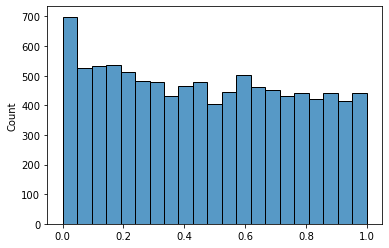

In [16]:
check_split(n_samples = 3000, n_tests = 10000)

Прокрас AA-теста: 11.27 %


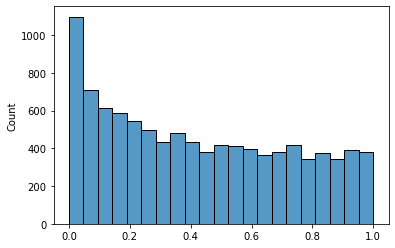

In [17]:
check_split(n_samples = 8000, n_tests = 10000)

### Сравнение mannwhitneyu

In [22]:
def check_split_MW(n_samples, n_tests = 10000):
    ctr_list = []
    for i in range(n_tests):
        first_group = df[df.exp_group == 2].ctr.sample(n_samples, replace=True)
        secong_group = df[df.exp_group == 3].ctr.sample(n_samples, replace=True)
        p_val = stats.mannwhitneyu(first_group, secong_group)[1]
        ctr_list.append(p_val)
    print('Прокрас AA-теста:', round((pd.Series(ctr_list) <= 0.05).sum() / len(ctr_list) * 100, 3), '%')
    sns.histplot(ctr_list);

Прокрас AA-теста: 4.31 %


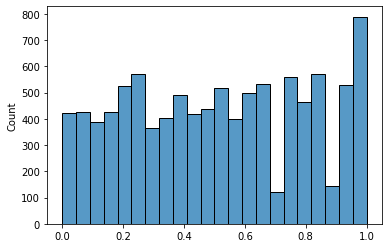

In [97]:
check_split_MW(n_samples = 10, n_tests = 10000)

In [98]:
check_split_MW(n_samples = 500, n_tests = 10000)

Прокрас AA-теста: 5.59 %


In [99]:
check_split_MW(n_samples = 3000, n_tests = 10000)

Прокрас AA-теста: 6.56 %


In [100]:
check_split_MW(n_samples = 8000, n_tests = 10000)

Прокрас AA-теста: 9.47 %


# Задание 2.
Пришло время проанализировать результаты эксперимента, который мы провели вместе с командой дата сайентистов. Эксперимент проходил  с 2022-01-28 по 2022-02-03 включительно. Для эксперимента были задействованы 0 и 1 группы.  
В 1 группе был использован новый алгоритм рекомендации постов, 0 группа использовалась в качестве контроля. 
Основная гипотеза заключается в том, что новый алгоритм в 1 группе приведет к увеличению CTR. 
Ваша задача — проанализировать данные АB-теста.

### Задачи:
1. Выбрать метод анализа и сравнить CTR в двух группах.
2. Провести контрольную проверку, что новый алгоритм не привел к тому, что сократилось число просмотров у пользователей. Типичная ситуация в АB-тестах — вырастили число лайков, но уменьшили число просмотров.
3. Написать рекомендацию, будем ли мы раскатывать новый алгоритм на всех новых пользователей.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandahouse as ph
from scipy import stats
sns.set(rc = {'figure.figsize' :(16, 6)}, style = 'whitegrid')
plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [11]:
# Подключение к БД
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20220120'
}

# Запрос к БД
query = '''
SELECT user_id,
       exp_group,
       countIf(user_id, action = 'like' ) as like,
       countIf(user_id, action = 'view' ) as view
       
FROM simulator_20220120.feed_actions
WHERE (toDate(time) >= '2022-01-28' AND toDate(time) <= '2022-02-03' 
AND exp_group in [0,1])
GROUP BY user_id, exp_group
'''

# Создание датафрейма
df = ph.read_clickhouse(query, connection=connection)

In [12]:
df

user_id  exp_group  like  view
0        26117          1     5    21
1       138232          1     5    29
2        49204          1    10    62
3        49286          1     7    19
4       145957          1    54   129
...        ...        ...   ...   ...
25994     3681          0     6    28
25995   110956          1    12    63
25996   132567          1    18    66
25997    30872          1    25    82
25998    11718          0     7    37

[25999 rows x 4 columns]

In [13]:
df['ctr']=df.like/df.view

In [14]:
df

user_id  exp_group  like  view       ctr
0        26117          1     5    21  0.238095
1       138232          1     5    29  0.172414
2        49204          1    10    62  0.161290
3        49286          1     7    19  0.368421
4       145957          1    54   129  0.418605
...        ...        ...   ...   ...       ...
25994     3681          0     6    28  0.214286
25995   110956          1    12    63  0.190476
25996   132567          1    18    66  0.272727
25997    30872          1    25    82  0.304878
25998    11718          0     7    37  0.189189

[25999 rows x 5 columns]

In [16]:
df.dtypes

user_id       uint32
exp_group       int8
like          uint64
view          uint64
ctr          float64
dtype: object

In [21]:
df.duplicated().sum()

0

In [22]:
df.isna().sum()

user_id      0
exp_group    0
like         0
view         0
ctr          0
dtype: int64

In [76]:
df[df['exp_group']==1].view.sum()

795729

## Отлично данные чистые

In [25]:
df[df['exp_group']==1].shape[0]

13002

In [26]:
df[df['exp_group']==0].shape[0]

12997

Выборки приблизительно одинаковы по колличеству

In [28]:
control_group=df[df['exp_group']==0].ctr

In [29]:
test_group=df[df['exp_group']==1].ctr

Строим распределение ctr по контрольной группе

Text(0.5, 1.0, 'Распределение ctr контрольной группы ')

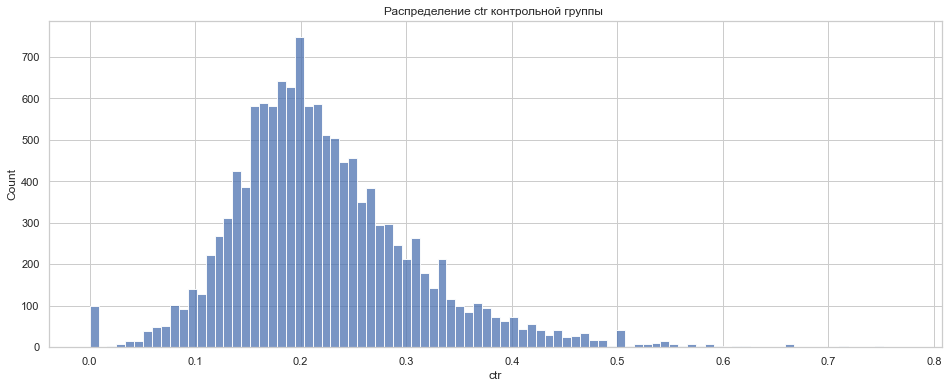

In [34]:
sns.histplot(data=control_group)
plt.title('Распределение ctr контрольной группы ')

In [56]:
print('Дисперсия = ',control_group.var())
print('Стандартное отклонени = ',control_group.std())
print('Среднее =', control_group.mean())
print('Медиана =', control_group.median())
print('Мода = ', control_group.mode()[0])

Дисперсия =  0.0077212041997076555
Стандартное отклонени =  0.08787038294959033
Среднее = 0.22195492956578272
Медиана = 0.20833333333333334
Мода =  0.2


In [42]:
#Проверим на нормальность распределение стат.тестом
stats.shapiro(control_group.sample(1000, random_state=17))

ShapiroResult(statistic=0.9561551213264465, pvalue=1.0090205868783968e-16)

Делаем вывод: тк pvalu<0.05 => распределение не нормальное

In [ ]:
Строим распределение ctr по тестовой группе

Text(0.5, 1.0, 'Распределение ctr тестовой группы ')

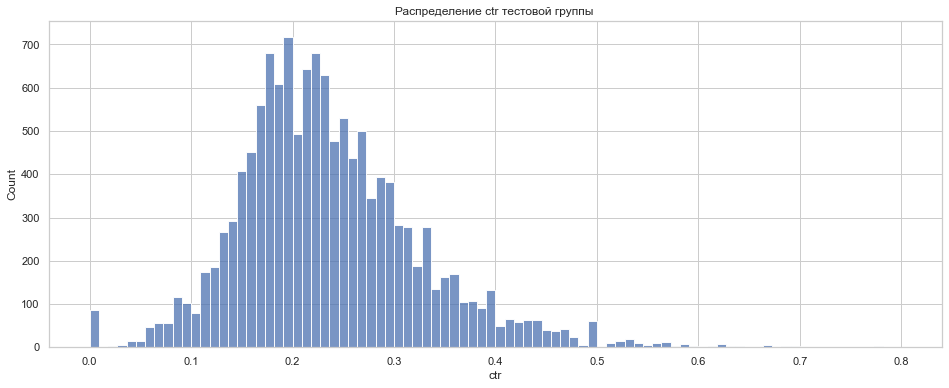

In [54]:
sns.histplot(test_group)
plt.title('Распределение ctr тестовой группы ')

In [59]:
print('Дисперсия = ',test_group.var())
print('Стандартное отклонени = ',test_group.std())
print('Среднее =', test_group.mean())
print('Медиана =', test_group.median())
print('Мода = ', test_group.mode()[0])

Дисперсия =  0.008126381697620247
Стандартное отклонени =  0.09014644584020075
Среднее = 0.23648646948093194
Медиана = 0.22413793103448276
Мода =  0.25


In [57]:
#Проверим на нормальность распределение стат.тестом
stats.shapiro(test_group.sample(1000, random_state=17))

ShapiroResult(statistic=0.9537094235420227, pvalue=3.259775195517143e-17)

Делаем вывод: тк pvalu<0.05 => распределение не нормальное

## Проверим гипотезы
- Н0: средние двух выборок равны
- Н1: средние двух выборок не равны 
    
Проверять будем двумя тестами : непараметрический Mann–Whitney (тк. распределение ненормальное и присутствуют выбросы) и бутстрапом.

In [64]:
# 1 способ u-test
pval=stats.mannwhitneyu(control_group,test_group)[1]

if pval<0.05:
    print('Отклоняем Н0')
else:
    print(print('не можем отклонить  Н0'))

Отклоняем Н0


## По тесту Mann–Whitney  можем сделаьб вывод,  что  есть статистически значимые различия в двух группах 

In [71]:
from scipy.stats import norm
from tqdm.auto import tqdm

In [72]:
# напишем функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1,                       # числовые значения первой выборки
    data_column_2,                       # числовые значения второй выборки
    boot_it = 1000,                      # количество бутстрэп-подвыборок
    statistic = np.mean,                 # интересующая нас статистика
    bootstrap_conf_level = 0.95          # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):        # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True                # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return { 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

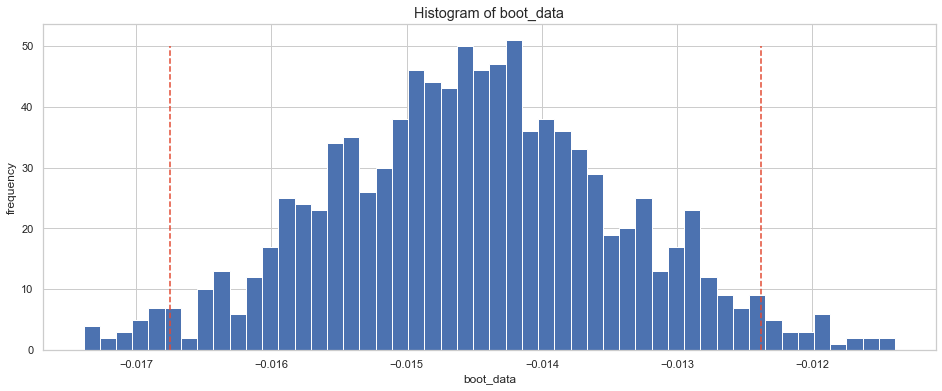

{'ci':               0
 0.025 -0.016747
 0.975 -0.012380,
 'p_value': 2.9729094697932425e-41}

In [73]:
get_bootstrap(control_group,test_group)

## По данном тесту можем сделать вывод, что 0 не попал в доверительный интервал(95%) и pval < 0.05  => отклоняем нулевую гипотезу


## Вывод: средние значения CTR в экпериментальной группе выше значений в контрольной

**Задача 2. Провести контрольную проверку, что новый алгоритм не привел к тому, что сократилось число просмотров у пользователей. Типичная ситуация в АB-тестах — вырастили число лайков, но уменьшили число просмотров.**

In [80]:
print('control')

print('число лайков в контрольной группе = ',df[df['exp_group']==0].like.sum())
print('число просмотров в контрольной группе = ',df[df['exp_group']==0].view.sum())

print('-----------')
print('test')
print('число лайков в тестовой группе = ',df[df['exp_group']==1].like.sum())
print('число просмотров в тестовой группе = ',df[df['exp_group']==1].view.sum())

control
число лайков в контрольной группе =  169777
число просмотров в контрольной группе =  796689
-----------
test
число лайков в тестовой группе =  182940
число просмотров в тестовой группе =  795729


## Просмотры остались прежние, но увеличислось сумма лайков(как  плюс нам)

***Нулевая гипотеза:*** число просмотров в экспериментальной группе равно или больше, нежели в контрольной группе \
***Альтернативная гипотеза:*** число просмотров в экспериментальной группе меньше, чем в контрольной. \
***Пороговое значение p-value:*** 0.05

In [82]:
stats.mannwhitneyu(df[df['exp_group']==0].view,df[df['exp_group']==1].view)

MannwhitneyuResult(statistic=84514942.0, pvalue=0.9717276363684261)

## Делаем вывод: Мы не можем отклонить нулевую гипотезу о равенстве средних число просмотров в текстовой и контрольной группе , тк pval>0.05

**Вывод:** новый алгоритм не привел к снижению количества просмотров в экспериментальной группе.

### Общий ВЫВОД
По результатам A/B теста, проходившего с 2022-01-28 по 2022-02-03 включительно на группах 0 и 1, был получен статистически значимый результат: увеличение количества CTR в экспериментальной группе, при неизменившемся количестве просмотров в контрольной. Рекоменую раскатать новый алгоритм в проде на всех пользователей.

# Задание 3.
Проанализировать мощность АB-теста, проведеного с 2022-01-28 по 2022-02-03, группами 0 и 1, метрикой CTR.
## Задача:
1. При помощи библиотеки метода TTestIndPower оценить какой размер выборки нам потребуется при условии:
    * Использовать t-test для сравнения CTR по юзерам.
    * Размер эффекта равен 0.3
    * Мощность теста равнялась 0.8
2. Рассчитать чему оказался равен размер эффекта в нашем проведенном АB-тесте
3. Сделайте вывод, могли бы использовать меньший размер выборки при сохранении мощности на уровне 0.8.

In [83]:
# Информация по группе 1
n_0 = df[df.exp_group == 0].shape[0]
std_0 = np.std(df[df.exp_group == 0].ctr)
mean_0 = np.mean(df[df.exp_group == 0].ctr)
print('n_0 =', n_0,'std_0 =', std_0, 'mean_0 =', mean_0)

n_0= 12997 std_0= 0.08786700247435683 mean_0= 0.22195492956578272


In [84]:
# Информация по группе 1
n_1 = df[df.exp_group == 1].shape[0]
std_1 = np.std(df[df.exp_group == 1].ctr)
mean_1 = np.mean(df[df.exp_group == 1].ctr)
print('n_1 =', n_1,'std_1 ', std_1, 'mean_1 ', mean_1)

n_1 = 13002 std_1  0.09014297913587735 mean_1  0.23648646948093194


In [85]:
ratio = n_1 / n_0
ratio

1.0003847041624991

**Задача 1. При помощи библиотеки метода TTestIndPower оценить какой размер выборки нам потребуется, при условии:**
* размер эффекта = 0.3,
* мощность эффекта = 0.8
* для сравнения используем t-test 

In [87]:
from statsmodels.stats.power import TTestIndPower
# Необходимый размер выборки
sample_size = TTestIndPower().solve_power(effect_size = 0.3, power = 0.8, alpha = 0.05, ratio=ratio)
sample_size

175.35094960543262

**Вывод:** минимальный размер выборки равен 176 при условии, что размер эффекта равен 0.3, мощность нашего теста равна 0.8

**Задача 2. Рассчитать чему оказался равен размер эффектафв нашем проведенном АB-тесте**

In [88]:
# Рассчитаем меру эффекта (стандартизированная средняя разница)
effect_size_AB = (mean_1 - mean_0) / ( ((n_1 - 1) * std_1**2 + (n_0 - 1) * std_0**2) / (n_1 + n_0 - 2) )**0.5
effect_size_AB

0.16325282935947466

**Вывод:** размер эффекта оказался равен 0.16

**Задача 3. Сделайте вывод, могли бы использовать меньший размер выборки при сохранении мощности на уровне 0.8**

In [89]:
# Размер выборки нашего A/B теста
sample_size_AB = TTestIndPower().solve_power(effect_size = effect_size_AB, power = 0.8, alpha = 0.05, ratio=ratio)
sample_size_AB

589.8483073834536

**Вывод:** размер выборки в нашем тесте оказался равен 590. Таким образом при сохранении мощности теста равным 0.8, мы могли бы использовать меньший размер выборки